In [1]:
import psycopg2
import pandas as pd
from config import config
from matplotlib import pylab as plt

%matplotlib inline

In [2]:
conn = None
try:
    # read connection parameters
    params = config()

    # connect to the PostgreSQL server
    print('Connecting to the PostgreSQL database...')
    conn = psycopg2.connect(**params)

    # create a cursor
    cur = conn.cursor()

    # execute a statement
    print('PostgreSQL database version:')
    cur.execute('SELECT version()')

    # display the PostgreSQL database server version
    db_version = cur.fetchone()
    print(db_version)

    # close the communication with the PostgreSQL
    cur.close()

except (Exception, psycopg2.DatabaseError) as error:
    print(error)

Connecting to the PostgreSQL database...
PostgreSQL database version:
('PostgreSQL 10.3 on x86_64-pc-linux-gnu, compiled by gcc (GCC) 7.3.0, 64-bit',)


In [3]:
urls = pd.read_sql_query("SELECT * FROM tweets_urls WHERE is_processed is true;", conn )
print("Number of Tweets: %s" %len(urls))

Number of Tweets: 92564


In [4]:
urls.head()

,tweet_id,short_url,resolved_url,response_code,domain,top_level_domain,is_twitter_url,is_media,is_processed,failed
0,954780323170209793,https://www.regenwald.org/petitionen/1113/2-8-...,https://www.regenwald.org/petitionen/1113/den-...,200.0,https://www.regenwald.org/,regenwald.org,False,False,True,False
1,952441403547766784,http://www.b2s.pm/oa1AAM,https://www.journalistenwatch.com/2018/01/14/i...,200.0,https://www.journalistenwatch.com/,journalistenwatch.com,False,False,True,False
2,952513194475573251,https://twitter.com/goldi/status/9522482233637...,https://twitter.com/goldi/status/9522482233637...,200.0,https://twitter.com/,twitter.com,True,False,True,False
3,952520523275173888,http://www.faz.net/-hs1-95xbh?GEPC=s3,http://www.faz.net/aktuell/stil/mode-design/mo...,200.0,http://www.faz.net/,faz.net,False,False,True,False
4,952522181212241920,http://die-musikbar.de/shop/freizeit-hobby/run...,http://die-musikbar.de/shop/freizeit-hobby/run...,200.0,http://die-musikbar.de/,die-musikbar.de,False,False,True,False


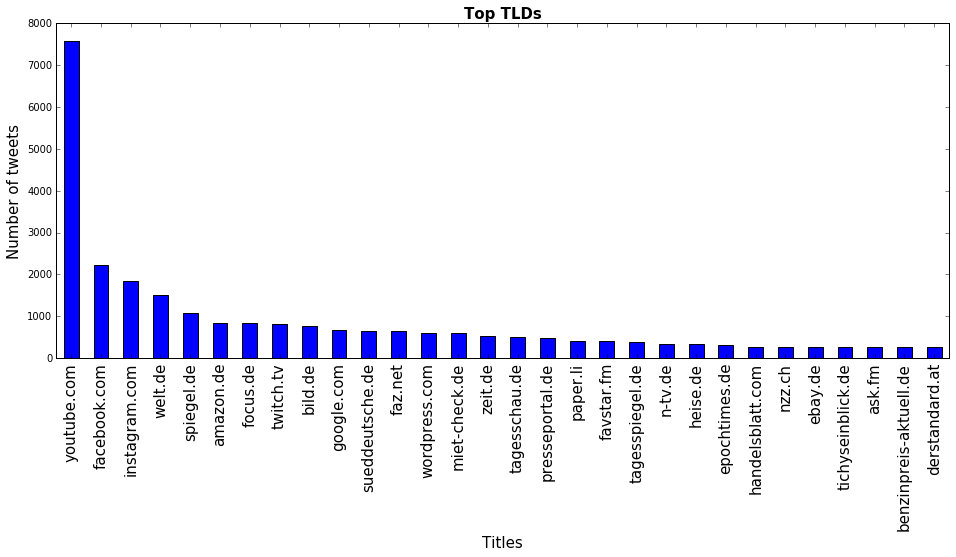

In [ ]:
top_level_domains_counted = urls['top_level_domain'][urls['is_twitter_url'] == False].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Titles', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top TLDs', fontsize=15, fontweight='bold')
top_level_domains_counted[0:30].plot( kind='bar', color='blue', figsize=(16, 6))

In [ ]:
top_level_domains_counted = urls['resolved_url'][urls['is_twitter_url'] == False].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Titles', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top TLDs', fontsize=15, fontweight='bold')
top_level_domains_counted.plot( kind='bar', color='blue', figsize=(16, 6))

In [ ]:
top_level_domains_counted[0:30]

In [ ]:
urls_pie = urls['is_media']
urls_pie_count = urls_pie.value_counts()
urls_pie_count.plot.pie(figsize=(6, 6), colors=['y', 'g'],autopct='%.2f', legend=True)

In [ ]:
urls['resolved_url'][urls['is_media'] == True].value_counts()

